In [8]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [9]:
load_dotenv()

model = ChatOpenAI(model="gpt-5-nano")

In [39]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str
    score: str

In [40]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [43]:
def create_eval(state: BlogState) -> BlogState:

    content = state['content']
    prompt = f'Based on the content of the blog - {content} give me score on scale of 10 in this json output: \n  Always return this json output format: {{socre: <blog score in integer value>}}'
    
    score = model.invoke(prompt).content
    print(score)
    state['score'] = str(score)

    return state

In [44]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content
    state['content'] = content

    return state

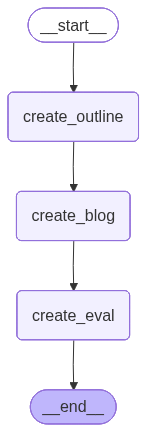

In [45]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('create_eval', create_eval)
# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'create_eval')
graph.add_edge('create_eval', END)
workflow = graph.compile()
workflow

In [46]:
intial_state = {'title': 'AI and Resource Consumption'}

final_state = workflow.invoke(intial_state)

print(final_state)

{"socre": 9}
{'title': 'AI and Resource Consumption', 'outline': 'Here’s a detailed outline you can use for a blog post (or a series) on AI and Resource Consumption. It’s broken into a core long-form outline plus a modular series option, with suggested subtopics, visuals, and angles to keep readers engaged.\n\nOption 1: Core long-form post outline (deep-dive, single article)\n\n1) Working title ideas (pick one)\n- AI and Resource Consumption: How Smart Algorithms Impact Our Energy, Materials, and Water\n- Powering Intelligence: The True Resource Footprint of AI\n- Green AI in Practice: Measuring, Reducing, and Reimagining AI’s Energy Use\n\n2) Executive hook (1-2 paragraphs)\n- Why this topic matters now: rapid AI model scaling, rising data center energy demand, and growing scrutiny over environmental impact.\n- The core thesis: AI can be energy- and material-intensive, but with the right mix of efficiency, policy, and design choices, we can curb its footprint while preserving benefits

In [29]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': 'Here’s a comprehensive, ready-to-use outline for a blog on the Rise of AI in India. It’s designed to support a detailed, engaging long-form piece, with clear sections, callouts, and suggested data points.\n\n1) Title options and hook\n- Suggested title: “Rise of AI in India: Tech Titan in the Making”\n- Subheading ideas: “From IT services to intelligent solutions shaping governance, healthcare, and everyday life”\n- Hook: A vivid opening anecdote or a striking statistic (e.g., number of AI startups or a milestone in government AI initiatives).\n\n2) Executive summary\n- A 250–350 word snapshot of the blog’s thesis: why India’s AI rise is distinctive, the driving forces, the current landscape, key sectors, challenges, and the path ahead.\n\n3) Why India is uniquely positioned for AI\n- Demographics: large, young, English- and multilingual workforce; digital adoption in tier-2/3 cities.\n- Tech heritage: strong IT services base, clever problem